[3, 0, 0, 3, 3, 0]
[[3, 0, 0, 3, 3, 0], [4, 2, 0, 3, 0, 1], [2, 2, 0, 3, 2, 0], [4, 1, 0, 3, 0, 1], [1, 1, 0, 3, 2, 0], [4, 0, 0, 3, 0, 1], [2, 0, 0, 3, 2, 0], [4, 1, 0, 3, 0, 1], [1, 1, 0, 3, 2, 0], [4, 0, 0, 3, 0, 1], [2, 0, 0, 3, 3, 0], [4, 1, 0, 3, 0, 1], [1, 1, 0, 3, 1, 0], [4, 0, 0, 3, 0, 1], [1, 0, 0, 3, 2, 0], [4, 0, 0, 2, 0, 1], [0, 0, 0, 2, 0, 0]]


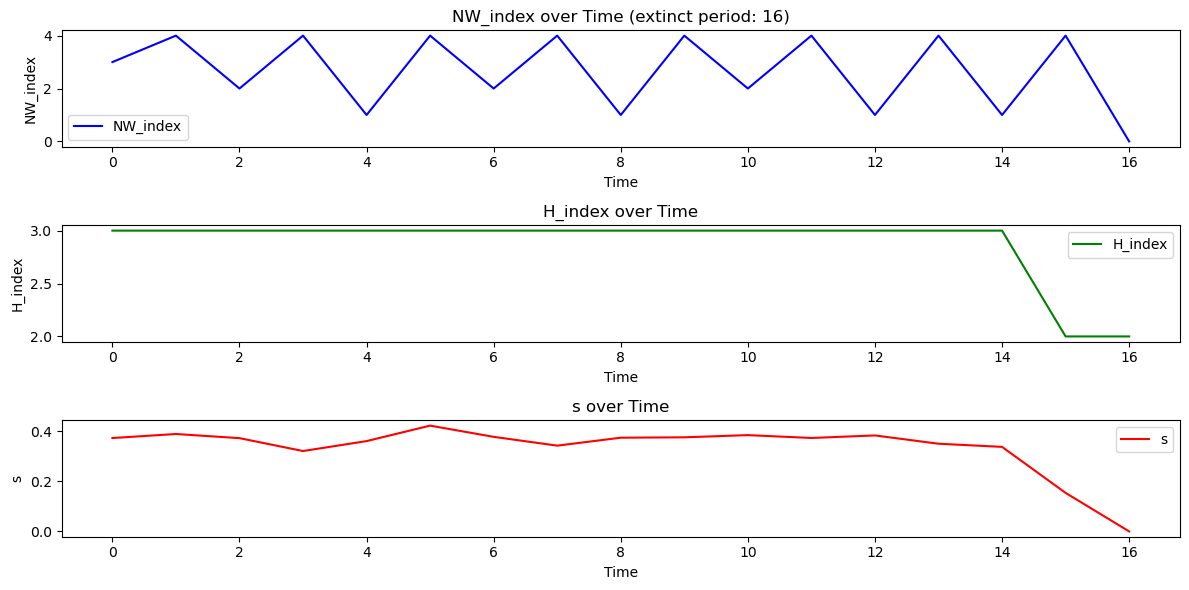

,NW,NWm1,NH,H,q,tau,s
0,3,0,0,3,3,0,0.373785
1,4,2,0,3,0,1,0.389923
2,2,2,0,3,2,0,0.373367
3,4,1,0,3,0,1,0.321770
4,1,1,0,3,2,0,0.361521
5,4,0,0,3,0,1,0.423467
6,2,0,0,3,2,0,0.378547
7,4,1,0,3,0,1,0.343347
8,1,1,0,3,2,0,0.375111
9,4,0,0,3,0,1,0.376686


In [89]:
# run the simulation
from env1_0 import Env1_0
from scipy.stats import poisson
import random
import pandas as pd
import numpy as np
# Set the seed
#random.seed(23)

env = Env1_0([-1,-1,-1,-1,-1,-1],2,2)
states = [env.state]
done = 0
rewards = []
extinct_period = -1
srates = [0]
print(env.state)
for i in range(100):
    #print(i+1)
    foo = env.step(0)
    srates.append(foo[2])
    if foo[1] == True:
        extinct_period = i
        break
    rewards.append(foo[0])
    #print(env.state)
    states.append(env.state)

if extinct_period != -1:
    srates = srates[1:]

print(states)
# Convert the list of states to a DataFrame and save to CSV
df_states = pd.DataFrame(states)
# include a column in df_states giving index of the NH state
#df_states['NW_index'] = df_states['NW'].apply(lambda x: env.states['NW'].index(x))
#df_states['H_index'] = df_states['H'].apply(lambda x: env.states['H'].index(x))
df_states['s'] = srates
# change column names
df_states.columns = ['NW', 'NWm1', 'NH', 'H', 'q', 'tau', 's']
df_states.to_csv('env_states.csv', index=False)



# plot NW over time 
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Plot NW_index over time
plt.subplot(3, 1, 1)
plt.plot(df_states['NW'], label='NW_index', color='blue')
plt.xlabel('Time')
plt.ylabel('NW_index')
plt.title(f'NW_index over Time (extinct period: {extinct_period})')
plt.legend()

# Plot H_index over time
plt.subplot(3, 1, 2)
plt.plot(df_states['H'], label='H_index', color='green')
plt.xlabel('Time')
plt.ylabel('H_index')
plt.title('H_index over Time',)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_states['s'], label='s', color='red')
plt.xlabel('Time')
plt.ylabel('s')
plt.title('s over Time',)
plt.legend()

plt.tight_layout()
plt.show()
df_states

# Value Iteration

In [1]:
# run value iteration algorithm to come up with optimal policy
import pickle
from value_iteration import value_iteration
from env1_0 import Env1_0
from scipy.stats import poisson, norm,binom
import random
import pandas as pd
import numpy as np

v = value_iteration([-1,-1,-1,-1,-1,-1],3,1)
#v.state = [1,1,2,0,0,1]
#foo = v.step(5)
#print(foo)

# spring flow (q)
#v._NWprobcalc0()
#v._NWprobcalc1()
#v._Hprobcalc0()
#v._Hprobcalc1()
#trp = v.compute_transition_probability()
Q, V, policy = v.value_iter()


delta=0.010446652306882243
delta=0.00988830043957023
delta=0.009359746657537471
delta=0.008859404150598493
delta=0.008385770340964882
delta=0.00793742243649831
iteration=170
delta=0.007513013210655117
delta=0.007111267003892863
delta=0.006730975944265083
delta=0.00637099635650884
delta=0.006030245363717768
delta=0.005707697669549816
delta=0.005402382508009396
delta=0.005113380753755337
delta=0.0048398221827028465
delta=0.0045808828861026996
iteration=180
delta=0.004335782805810595
delta=0.004103783415303042
delta=0.003884185510514726
delta=0.003676327126186152
delta=0.0034795815581674105
delta=0.0032933554900864692
delta=0.0031170872182428866
delta=0.0029502449767733196
delta=0.0027923253426251904
delta=0.0026428517289787123
iteration=190
delta=0.0025013729618876823
delta=0.0023674619239955064
delta=0.0022407142798783752
delta=0.0021207472595961008
delta=0.0020071985150025284
delta=0.0018997250283518952
delta=0.0017980020900267846
delta=0.0017017223153743544
delta=0.0016105947290725453

# check transition probability


In [ ]:
# take random states and sample next step probabilities and compare it to the transition probabilities
import pickle
from value_iteration import value_iteration
from env1_0 import Env1_0
from scipy.stats import poisson, norm,binom
import random
import pandas as pd
import numpy as np
env = Env1_0([-1,-1,-1,-1,-1,-1],3,1)

with open(f"trp{env.envID}_par{env.parset}_dis{env.discset}.pkl", "rb") as file:
    trp = pickle.load(file)

samplenum = 100000
testnum = 20
for i in range(testnum):
    env.reset([-1,-1,-1,-1,-1,-1])
    a = random.randint(0,4)
    startstate = env.state
    startsid  = env._flatten(env.state)
    nextstates = []
    for sample in range(samplenum):
        env.reset(startstate)
        env.step(a)
        nexts = env._flatten(env.state)
        nextstates.append(nexts)
    trpteststates,counts =np.unique(nextstates,return_counts=True,axis=0)
    trptestprob = counts/samplenum
    trptest = [(trpteststates[i],trptestprob[i]) for i in range(len(trpteststates))]
    trptest = tuple(trptest)
    trpstates = [s for s,p in trp[startsid][a]]
    trpprobs = [p for s,p in trp[startsid][a]]
    print(f'start: {startsid}, action: {a}')
    print(trptest)
    print(trp[startsid][a])
    # check all the states in trptest is in trp
    #for j in range(len(trpteststates)):
    #    print(f'checking state {trpteststates[j]}')
    #    if trpteststates[j] not in trpstates:
    #        print(f"State {trpteststates[j]} not found in transition probability set")
    #        continue
    #    else:
    #        idx = np.where(trpstates==trpteststates[j])
    #        print(idx)
    #        trpprobs = trpprobs[idx[0][0]]
    #        print(trpprobs)
    #        if abs(trptestprob[j] - trpprobs) > 0.01:
    #            print(f"State {trpteststates[j]} probability doesn't match: test={trptestprob[j]} vs expected={trpprobs}")
    input()




start: 8406, action: 3
((9661, 0.61825), (9671, 0.08174), (9681, 0.00075), (11761, 0.18925), (11771, 0.10706), (11781, 0.00293), (11791, 2e-05))
((9661, 0.6215666666666667), (9671, 0.08023333333333334), (9681, 0.0010333333333333334), (11761, 0.18886666666666665), (11771, 0.1052), (11781, 0.0031))
start: 12741, action: 0
((6300, 0.00045), (6302, 0.00068), (6304, 0.00047), (6306, 0.00058), (6308, 0.00033), (8400, 0.14602), (8402, 0.24692), (8404, 0.20982), (8406, 0.24751), (8408, 0.14722))
((6300, 0.0004333333333333333), (6302, 0.0005666666666666667), (6304, 0.0009333333333333333), (6306, 0.0005), (6308, 0.0002666666666666667), (8400, 0.14303333333333335), (8402, 0.2484), (8404, 0.20576666666666665), (8406, 0.2528666666666667), (8408, 0.14723333333333333))
start: 10171, action: 1
((1760, 0.03204), (1762, 0.05322), (1764, 0.04483), (1766, 0.05255), (1768, 0.03131), (1770, 0.1135), (1772, 0.19538), (1774, 0.16415), (1776, 0.19657), (1778, 0.11645))
((1760, 0.031), (1762, 0.0532666666666666

# print Q (value iteration)

In [3]:
# run value iteration algorithm to come up with optimal policy
import pickle
from value_iteration import value_iteration
from env1_0 import Env1_0
from scipy.stats import poisson, norm,binom
import random
import pandas as pd
import numpy as np
env = Env1_0([-1,-1,-1,-1,-1,-1],3,1)

with open(f'value iter results\Q_Env1.0_par{env.parset}_dis{env.discset}_valiter.pkl', 'rb') as f:
    Q = pickle.load(f)
# Q in terminal states 
NWr = np.arange(0,len(env.states['NW']))
NWm1r = 3
NHr = 0
Hr = np.arange(0,len(env.states['H']))
qr = 0#np.arange(0,len(env.states['q']))#2
taur = 0
Q_sub = env.Qsubcalc(Q,[NWr,NWm1r,NHr,Hr,qr,taur])


np.set_printoptions(suppress=True, precision=8)
print(np.round(Q_sub, 3))



[[[-100.    -100.    -100.    -100.    -100.    -100.    -100.   ]
  [ -78.583  -75.82   -70.496  -63.157  -58.522  -47.505  107.293]
  [ -58.237  -55.465  -18.573  110.548  376.62   686.743  916.688]
  [ -56.658  -25.682  117.345  311.816  559.297  818.594 1002.608]
  [ 203.819  222.39   278.095  421.334  659.448  895.078 1043.96 ]
  [ 249.137  263.881  323.67   488.013  727.81   938.757 1063.545]
  [ 260.297  283.016  362.718  543.615  772.934  960.421 1070.337]]

 [[-100.    -100.    -100.    -100.    -100.    -100.    -100.   ]
  [ -93.732  -57.545   25.104  146.413  276.683  420.303  638.599]
  [ 125.405  169.015  196.198  239.026  381.126  666.031  896.327]
  [ 168.841  183.427  220.524  323.925  543.006  800.013  982.126]
  [ 184.208  203.496  262.296  402.205  640.216  873.758 1023.684]
  [ 229.177  243.969  303.245  467.553  706.12   917.615 1043.123]
  [ 240.395  262.864  342.276  521.145  752.805  939.767 1050.664]]

 [[-100.    -100.    -100.    -100.    -100.    -100.    -

<>:11: SyntaxWarning: invalid escape sequence '\Q'
<>:11: SyntaxWarning: invalid escape sequence '\Q'
C:\Users\Hyun\AppData\Local\Temp\ipykernel_20624\2780643703.py:11: SyntaxWarning: invalid escape sequence '\Q'
  with open(f'value iter results\Q_Env1.0_par{env.parset}_dis{env.discset}_valiter.pkl', 'rb') as f:


# Q value difference between the best and 2nd best actions (value iteration)


In [14]:
# run value iteration algorithm to come up with optimal policy
import pickle
from value_iteration import value_iteration
from env1_0 import Env1_0
from scipy.stats import poisson, norm,binom
import random
import pandas as pd
import numpy as np
env = Env1_0([-1,-1,-1,-1,-1,-1],3,1)

with open(f'value iter results\Q_Env1.0_par{env.parset}_dis{env.discset}_valiter.pkl', 'rb') as f:
    Q = pickle.load(f)
# Q in terminal states 
NWr = np.arange(0,len(env.states['NW']))
NWm1r = 3
NHr = 0
Hr = np.arange(0,len(env.states['H']))
qr = 0#np.arange(0,len(env.states['q']))#2
taur = 0
Q_sub = env.Qsubcalc(Q,[NWr,NWm1r,NHr,Hr,qr,taur])

Qdiff = np.zeros((len(NWr),len(Hr)))
for i in range(len(NWr)):
    for j in range(len(Hr)):
        highest = -100000
        secondhighest = -1000
        for k in range(env.actionspace_dim[0]):
            if highest < Q_sub[k][i,j]:
                secondhighest = highest
                highest = Q_sub[k][i,j]
            elif secondhighest < Q_sub[k][i,j]:
                secondhighest = Q_sub[k][i,j]
        Qdiff[i,j] = highest - secondhighest
        

np.round(Qdiff,2)


<>:11: SyntaxWarning: invalid escape sequence '\Q'
<>:11: SyntaxWarning: invalid escape sequence '\Q'
C:\Users\Hyun\AppData\Local\Temp\ipykernel_28560\4246115933.py:11: SyntaxWarning: invalid escape sequence '\Q'
  with open(f'value iter results\Q_Env1.0_par{env.parset}_dis{env.discset}_valiter.pkl', 'rb') as f:


array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [13.74,  1.75,  0.17,  1.59,  5.56, 27.93, 22.19],
       [19.36, 12.93,  5.48,  1.14,  0.69, 19.8 , 20.33],
       [17.58, 10.78,  3.17,  0.3 , 16.29, 18.58, 20.03],
       [ 6.82,  3.11,  9.08, 19.13, 18.44, 19.24, 20.14],
       [19.84, 19.86, 19.56, 20.39, 18.21, 20.61, 20.31],
       [19.9 , 20.01, 19.32, 21.26, 19.18, 19.37, 19.67]])

# RUN Q-LEARNING ALGORITHM

In [ ]:
# run sarsa algorithms to come up with optimal policy using nonclass version of td_learning
import pickle
from numba import jit
from td_learning_nonclass import *
from env1_0 import Env1_0
from scipy.stats import poisson, norm,binom
import random
import pandas as pd
import numpy as np
seednum = 32
random.seed(seednum)
np.random.seed(seednum)

td = Env1_0([-1,-1,-1,-1,-1,-1],2,1)
# sarsaoption = 0 for Sarsa(lambda) and 1 for Q-Learning(lambda) 
# num_episodes = number of episodes to train the agent
# lam = lambda value for Sarsa(lambda) and Q-Learning(lambda)

# Qinitoption
# 0 = zero initialization
# 1 = immediate reward init.
# 2 = immediate + exp. next reward 

# epdecayoption
# 0 = for inverse decay, 
# 1 = inverse decay with a minimum of 0.01
# 2 = for pure exploration for 10% and then inverse decay
# 3 = exponential
# 4 = logistic

# lroption
# 0 = constant learning rate
# 1 = inverse decay
# 2 = exponential
# 3 = logistic
# 4 = logistic decay with step-down
Q, policy, Q_update_counter, Qchanges, rewards, MSE = td_lambda(
    td,num_episodes=100000,sarsaoption=1,lam=0.8,Qinitopt=2,epdecayopt=4,lropt=3)



# MSE

MSE = 39.27437421639097


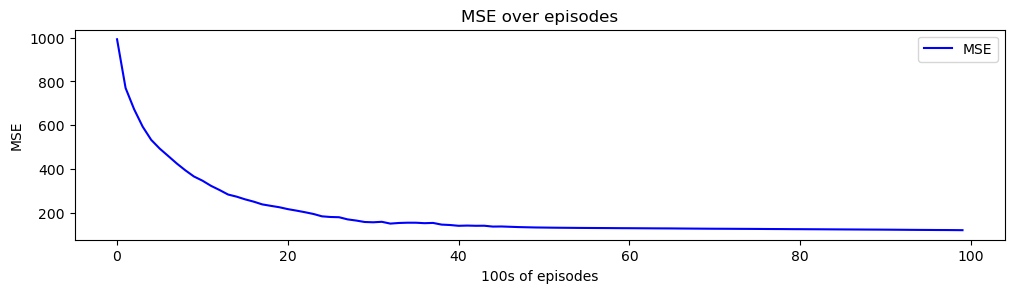

In [ ]:
from env1_0 import Env1_0
import pickle
import matplotlib.pyplot as plt



# compare the difference in between the Q from value iteration and the Q from Qlearning.
td = Env1_0([-1,-1,-1,-1,-1,-1],2,1)
lam = 0.7

#with open(f"value iter results/Q_Env1.0_par{td.parset}_dis{td.discset}_valiter.pkl", "rb") as file:
#    Q_vi = pickle.load(file)

#with open(f"td results/Q_Env1.0_par1_Qlearning(lambda{lam})-best.pkl", "rb") as file:
#    Q_q = pickle.load(file)
#Q_q = Q
# get the difference in Q
reachables = td.reachable_state_actions()
reachables
diff = 0
for i in range(len(reachables)):
    diff += (Q_vi[reachables[i][0],reachables[i][1]] - Q_q[reachables[i][0],reachables[i][1]])**2
Q_diff = 1/len(reachables)*diff
print(f'MSE = {Q_diff}')

# plot MSE over steps.
unit = 100

plt.figure(figsize=(12, 6))
# Plot NW_index over time
plt.subplot(2, 1, 1)
plt.plot(MSE, label='MSE', color='blue')
plt.xlabel('100s of episodes')
plt.ylabel('MSE')
plt.title(f'MSE over episodes')
plt.legend()

# Q learning State-action space coverage

In [3]:
from env1_0 import Env1_0
env = Env1_0([-1,-1,-1,-1,-1,-1],3,1)
reachable_sa = len(env.reachable_state_actions()) #14700
reachable_s = len(env.reachable_states()) #2940
print(f'number of reachable state-action pairs: {reachable_sa}')
print(f'number of reachable states: {reachable_s}')
#nonzero_policy = np.where(policy > 0)
#print(len(nonzero_policy[0]))
#[[td._unflatten(i),policy[i]] for i in nonzero_policy[0]]
V_counter = np.array([max(Q_update_counter[i,:]) for i in range(np.prod(td.statespace_dim))])
num_stateupdated = len(np.where(V_counter > 0)[0])# number of updated states
num_updated = len(np.where(Q_update_counter > 0)[0])# number of updated state action pairs
percentage_updated = num_updated/reachable_sa
#num_stateupdated = len(np.where(state_visit_counte > 0)[0])# number of updated states
percentage_stateupdated = num_stateupdated/reachable_s
print(f'number of updated state action pairs: {num_updated}')
print(f'percentage of updated state action pairs: {percentage_updated}') 
print(f'number of updated states: {num_stateupdated}')
print(f'percentage of updated states: {percentage_stateupdated}')


number of reachable state-action pairs: 14700
number of reachable states: 2940
number of updated state action pairs: 13639
percentage of updated state action pairs: 0.9278231292517006
number of updated states: 2759
percentage of updated states: 0.9384353741496598


# average performance of value iteration policy and q-learning policy


[[     0.      0.      0.      0.      0.      0.      0.]
 [     0. 300000. 300000. 300000. 300000. 300000. 300000.]
 [300000. 300000. 300000. 300000. 225000.      0.      0.]
 [300000. 300000. 300000. 300000.      0.      0.      0.]
 [300000. 300000.      0.      0.      0.      0.      0.]
 [     0.      0.      0.      0.      0.      0.      0.]
 [     0.      0.      0.      0.      0.      0.      0.]]


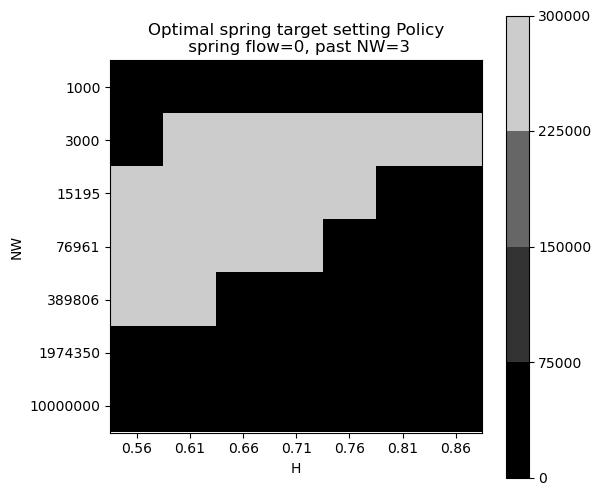

In [10]:
# plot the fall stocking policy and spring target production setting policy
# in a grid where each cell is colored according to the action
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
from value_iteration import value_iteration
from env1_0 import Env1_0
from scipy.stats import poisson, norm,binom
import random
import pandas as pd
import numpy as np

def plot_policy(class_obj,q_idx,NWm1_idx,optim_method,lambda_val,spring_or_fall):
    # Plot Fall stocking policy in a grid
    # x axis is the number of NW individuals
    # y axis is the number of H individuals
    # color is the action with darker color indicating higher action
    # class_obj is the class object


    # read in policy and action value function pickle files
    if optim_method == 0:
        wd = './value iter results'
        method_str = 'valiter'
    elif optim_method == 1:
        wd = './td results'
        method_str = f'sarsa(lambda{lambda_val})'
    elif optim_method == 2:
        wd = './td results'
        method_str = f'Qlearning(lambda{lambda_val})'
    elif optim_method == 3:
        wd = './td results'
        method_str = 'sarsa_n'
    elif optim_method == 4:
        wd = './td results'
        method_str = 'sarsa_n'

    policyfilename = f"{wd}/policy_{env.envID}_par{env.parset}_dis{env.discset}_{method_str}.pkl"
    Qfilename = f"{wd}/Q_{env.envID}_par{env.parset}_dis{env.discset}_{method_str}.pkl"
    #print(policyfilename)
    with open(policyfilename, "rb") as file:
        policy = pickle.load(file)
    with open(Qfilename, "rb") as file:
        Q = pickle.load(file)
    if optim_method == 0:
        with open(f"{wd}/V_{env.envID}_par{env.parset}_dis{env.discset}_{method_str}.pkl", "rb") as file:
            V = pickle.load(file)

    # class_obj is the class object of the environment
    actions = np.zeros((len(class_obj.states['NW']), len(class_obj.states['H'])))
    #print(len(policy))
    # other variables
    q = class_obj.states['q'][q_idx]
    tau_idx = spring_or_fall
    if spring_or_fall == 0:
        NH_idx = 0
    NH_idx = len(class_obj.states['NH']) - 1
    actions_idxs = []
    #NWm1_idx = 3 #NW_idx - 1 if NW_idx > 0 else 1

    # get optimal actions according to the policy for each state in the grid
    for NW_idx in range(len(class_obj.states['NW'])):
        for H_idx in range(len(class_obj.states['H'])):
            state_idx = [NW_idx, NWm1_idx, NH_idx, H_idx, q_idx, tau_idx]
            stateid = class_obj._flatten(state_idx)
            actions[NW_idx, H_idx] = class_obj.actions['a'][int(policy[stateid])]
            #print(state_idx)
            actions_idxs.append(int(policy[stateid]))
    print(actions)
    #print(actions_idxs)
    # Define a discrete colormap
    # create nbins number of gray scale colors in hex in a list
    nbins = np.max(actions_idxs) +1
    colorhex = [f'#{int(255*(i/nbins)):02x}{int(255*(i/nbins)):02x}{int(255*(i/nbins)):02x}' for i in range(nbins)]
    cmap = mcolors.ListedColormap(colorhex)

    bounds = env.actions['a'][0:nbins]
    #print(nbins)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    # Plot the grid with the discrete colormap
    plt.figure(figsize=(6, 6))
    plt.imshow(actions, cmap=cmap, norm=norm)
    plt.xticks(range(len(env.states['H'])), env.states['H'])
    plt.yticks(range(len(env.states['NW'])), env.states['NW'])
    plt.colorbar(ticks=bounds)
    plt.xlabel('H')
    plt.ylabel('NW')
    if spring_or_fall == 0:
        sfstr = 'spring'
        plt.title(f'Optimal {sfstr} target setting Policy\n spring flow={q_idx}, past NW={NWm1_idx}')
    else:
        sfstr = 'fall'
        plt.title(f'Optimal {sfstr} Stocking Policy\n fall flow={q_idx}, past NW={NWm1_idx}')
    plt.show()
    return actions

env = Env1_0([-1,-1,-1,-1,-1,-1],3,1)
optim_method = 0 # 0 for value iteration, 1 for sarsa(lambda), 2 for Q-learning(lambda), 3 for sarsa(n), 4 for sarsa(n)
lambda_val = 0.3
qval = 0
NWm1val = 3
optactions = plot_policy(env,qval,NWm1val,optim_method,lambda_val,spring_or_fall=0) # 0 for spring, 1 for fall



# print Q (td learning)

In [ ]:
# run value iteration algorithm to come up with optimal policy
import pickle
from value_iteration import value_iteration
from env1_0 import Env1_0
from scipy.stats import poisson, norm,binom
import random
import pandas as pd
import numpy as np
env = Env1_0([-1,-1,-1,-1,-1,-1],3,1)
lam = 0.3
with open(f'td results\Q_Env1.0_par{env.parset}_dis{env.discset}_Qlearning(lambda{lam}).pkl', 'rb') as f:
    Q = pickle.load(f)
#filename = f'initQopt2_{env.envID}_par{env.parset}_dis{env.discset}.pkl' # initialized Q with immediate reward and the next expected reward
#with open(filename, "rb") as file:
#    Q = pickle.load(file)
#Q = Q_update_counter

# Q in terminal states 
NWr = np.arange(0,len(env.states['NW']))
NWm1r = 3
NHr = 0
Hr = np.arange(0,len(env.states['H']))
qr = 0#np.arange(0,len(env.states['q']))#2
taur = 0
Q_sub2 = env.Qsubcalc(Q,[NWr,NWm1r,NHr,Hr,qr,taur])

# Disable scientific notation for printing and set precision to 1000 decimal places
np.set_printoptions(suppress=True, precision=8)
print(np.round(Q_sub2, 3))



In [ ]:
state = [1,3,0,1,0,0]
stateid = env._flatten(state)
env.reset(state)
env.step(4)
print(env.state)

with open(f"trp{env.envID}_par{env.parset}_dis{env.discset}.pkl", "rb") as file:
    trp = pickle.load(file)
possible_states = trp[stateid][4]
for i in possible_states:
    print(f'state: {env._unflatten(i[0])}, prob: {i[1]}')

# difference between td Q and value iteration Q

In [ ]:
# run value iteration algorithm to come up with optimal policy
import pickle
from value_iteration import value_iteration
from env1_0 import Env1_0
from scipy.stats import poisson, norm,binom
import random
import pandas as pd
import numpy as np
env = Env1_0([-1,-1,-1,-1,-1,-1],3,1)
lam = 0.3
with open(f'td results\Q_Env1.0_par{env.parset}_dis{env.discset}_Qlearning(lambda{lam}).pkl', 'rb') as f:
    Q_td = pickle.load(f)
with open(f"value iter results/Q_Env1.0_par{env.parset}_dis{env.discset}_valiter.pkl", "rb") as file:
    Q_vi = pickle.load(file)

# Q in terminal states 
NWr = np.arange(0,len(env.states['NW']))
NWm1r = 3
NHr = 0
Hr = np.arange(0,len(env.states['H']))
qr = 0#np.arange(0,len(env.states['q']))#2
taur = 0
Qtd_sub = env.Qsubcalc(Q_td,[NWr,NWm1r,NHr,Hr,qr,taur])
Q_vi_sub = env.Qsubcalc(Q_vi,[NWr,NWm1r,NHr,Hr,qr,taur])

np.set_printoptions(suppress=True, precision=8) # disable scientific notation for printing
for i in range(len(env.actions['a'])):
    print(f'action: {i}')
    Qdiff = abs(Q_vi_sub[i] - Qtd_sub[i])
    print(np.round(Qdiff, 0))    





# Qlearning Q dist; change in Q over episodes; policy dist; rewards

In [ ]:
import matplotlib.pyplot as plt

td = Env1_0([-1,-1,-1,-1,-1,-1],2,1)

unupdated_idxs = np.where(Q_update_counter == 0)
idxs2 = np.where(Q_update_counter > 1)
idxs = np.where(np.logical_and(Q_update_counter > 20, Q_update_counter <= 30))
# unflatten each idxs
# max value of Q for given state
updatedQ = [max(Q[idxs2[0][i],[idxs2[1][i]]]) for i in range(len(idxs2[0]))]
unupdatedQ = [max(Q[unupdated_idxs[0][i],[unupdated_idxs[1][i]]]) for i in range(len(unupdated_idxs[0]))]
# plot histogram of updated Q
plt.figure(figsize=(12, 6))

# Plot histogram of updated Q
plt.subplot(2, 1, 1)
plt.hist(updatedQ, bins=50, color='blue', alpha=0.7, label='Updated Q')
plt.xlabel('Q-value')
plt.ylabel('Frequency')
plt.title('Histogram of Updated Q-values')
plt.legend()
# Plot histogram of unupdated Q
plt.subplot(2, 1, 2)
plt.hist(unupdatedQ, bins=50, color='red', alpha=0.7, label='Unupdated Q')
plt.xlabel('Q-value')
plt.ylabel('Frequency')
plt.title('Histogram of Unupdated Q-values')
plt.legend()

plt.tight_layout()
plt.show()

# plot the Qchanges over every episode
plt.figure(figsize=(12, 6))
plt.plot(Qchanges)
plt.xlabel('Episodes')
plt.ylabel('Qchanges')
plt.title('Qchanges over Episodes')
plt.show()

# plot the total rewards for every episode
plt.figure(figsize=(12, 6))
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Rewards over Episodes')
plt.show()



# get the policy for the updated Q
policy_updated = policy[idxs2[0]]
policy_unupdated = policy[unupdated_idxs[0]]
uniquevals, counts = np.unique(policy_updated, return_counts=True)
print("unique actions in the policy of updated S-A pairs",uniquevals)
print("counts",counts)
uniquevals, counts = np.unique(policy_unupdated, return_counts=True)
print("unique actions in the policy of unupdated S-A pairs",uniquevals)
print("counts",counts)

# Plot histogram of updated state policy
plt.subplot(2, 1, 1)
plt.hist(policy_updated, bins=50, color='blue', alpha=0.7, label='Updated Q')
plt.xlabel('actions')
plt.ylabel('Frequency')
plt.title('Histogram of Updated policy')
plt.legend()
# Plot histogram of unupdated state policy
plt.subplot(2, 1, 2)
plt.hist(policy_unupdated, bins=50, color='red', alpha=0.7, label='Unupdated Q')
plt.xlabel('actions')
plt.ylabel('Frequency')
plt.title('Histogram of Unupdated policy')
plt.legend()
plt.tight_layout()
plt.show()

# Value iteration Q distribution

In [ ]:
with open(f"value iter results/Q_Env1.0_par1_valiter.pkl", "rb") as file:
    Q = pickle.load(file)

# plot histogram of Q
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
plt.hist(Q.flatten(), bins=100)

plt.xlabel('Q values')
plt.ylabel('Frequency')
plt.title('Histogram of Q values')
plt.show()

# Deep Q learning

In [1]:
from collections import deque
import torch
from torch import nn
from torchvision.transforms import ToTensor
from torch.optim.lr_scheduler import ExponentialLR
import os
from IPython.display import display
import pickle
import math
import numpy as np
import random
from DQN import *
from env1_0 import Env1_0
seednum = 10
random.seed(seednum)
np.random.seed(seednum)
torch.manual_seed(seednum)

env = Env1_0([-1,-1,-1,-1,-1,-1],2,1)
# basic settings
num_episodes = 15000
epdecayopt = 4 # epsilon decay option

# DQN extra extensions
DDQN = True
DuelingDQN = False
PrioritizedReplay = False

Q, policy, MSE = DQN(env,num_episodes,epdecayopt,DDQN,DuelingDQN,PrioritizedReplay) 
#Q, policy, MSE = DQN(env,num_episodes,Qinitopt,epdecayopt,lropt)
# store deepQN MSE results as numpy object
np.save(f"DQN_MSE_{env.envID}_par{env.parset}_dis{env.discset}.npy", MSE)






DuelingDQN: False
 DDQN: True
 PrioritizedReplay: False
Using cpu device


AttributeError: 'Memory' object has no attribute 'max_priority'

# MSE

final 41.075923919677734


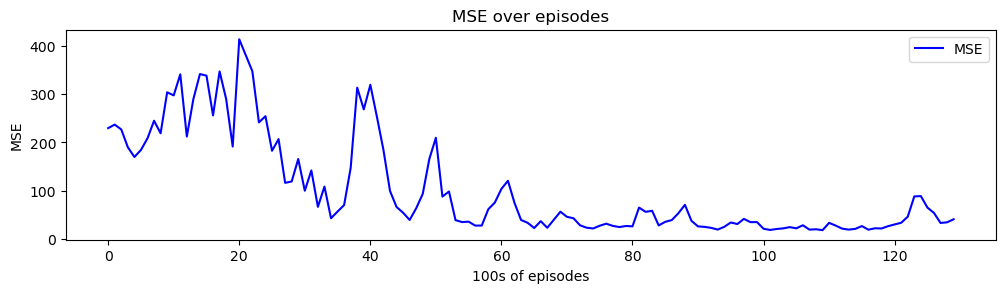

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from env1_0 import Env1_0

# load MSE 
env = Env1_0([-1,-1,-1,-1,-1,-1],2,1)
MSE = np.load(f"DQN_MSE_{env.envID}_par{env.parset}_dis{env.discset}.npy")
plt.figure(figsize=(12, 6))
# Plot NW_index over time
plt.subplot(2, 1, 1)
plt.plot(MSE[20:], label='MSE', color='blue')
plt.xlabel('100s of episodes')
plt.ylabel('MSE')
plt.title(f'MSE over episodes')
plt.legend()
print(f'final {MSE[-1]}')


# Print Q (DQN)

In [2]:
# run value iteration algorithm to come up with optimal policy
import pickle
from value_iteration import value_iteration
from env1_0 import Env1_0
from scipy.stats import poisson, norm,binom
import random
import pandas as pd
import numpy as np
env = Env1_0([-1,-1,-1,-1,-1,-1],2,1)
with open(f'deepQN results\Q_Env1.0_par{env.parset}_dis{env.discset}_DQN.pkl', 'rb') as f:
    Q = pickle.load(f)

NWr = np.arange(0,len(env.states['NW']))
NWm1r = 3
NHr = 0
Hr = np.arange(0,len(env.states['H']))
qr = 0#np.arange(0,len(env.states['q']))#2
taur = 0
Q_sub2 = env.Qsubcalc(Q,[NWr,NWm1r,NHr,Hr,qr,taur])

# Disable scientific notation for printing and set precision to 1000 decimal places
np.set_printoptions(suppress=True, precision=8)
print(np.round(Q_sub2, 3))



<>:10: SyntaxWarning: invalid escape sequence '\Q'
<>:10: SyntaxWarning: invalid escape sequence '\Q'
C:\Users\Hyun\AppData\Local\Temp\ipykernel_13204\296620397.py:10: SyntaxWarning: invalid escape sequence '\Q'
  with open(f'deepQN results\Q_Env1.0_par{env.parset}_dis{env.discset}_DQN.pkl', 'rb') as f:


[[[ -94.788  -98.462 -104.009 -102.641 -100.42   -99.55  -100.885]
  [ -96.196  -96.311 -127.845 -112.061 -109.09  -100.906  -78.843]
  [-115.596 -115.833 -109.259  -47.817  -33.295  -12.589    4.812]
  [ -92.042  -77.261  -44.209  -36.031  -20.1     -2.038   14.812]
  [ -49.461  -46.816  -40.193  -32.698  -16.804    2.077   17.016]
  [ -45.305  -43.09   -36.404  -28.781  -13.508    5.822   17.932]
  [ -42.789  -39.127  -32.975  -28.543   -9.959    9.074   18.891]]

 [[ -93.773  -93.115  -99.061 -100.719 -100.738 -101.548 -104.242]
  [ -96.062  -91.576  -86.161  -66.233  -49.084  -29.688  -12.572]
  [ -56.296  -53.534  -52.399  -42.32   -30.233   -9.784    5.793]
  [ -50.533  -48.5    -42.827  -35.102  -20.227   -0.937   14.741]
  [ -47.236  -45.567  -39.773  -32.372  -17.129    3.328   17.048]
  [ -44.942  -42.773  -36.662  -28.922  -14.03     7.112   18.243]
  [ -43.236  -40.098  -34.767  -29.042  -10.597    9.865   19.227]]

 [[ -97.718  -99.501 -104.887 -106.194 -106.604 -107.101 -

1